In [1]:
import pandas as pd

In [2]:
teams=pd.read_csv('teams.csv')

In [6]:
teams.head

<bound method NDFrame.head of      team  year  athletes  events   age  height  weight  prev_medals  medals
0     AFG  1964         8       8  22.0   161.0    64.2          0.0       0
1     AFG  1968         5       5  23.2   170.2    70.0          0.0       0
2     AFG  1972         8       8  29.0   168.3    63.8          0.0       0
3     AFG  1980        11      11  23.6   168.4    63.2          0.0       0
4     AFG  2004         5       5  18.6   170.8    64.8          0.0       0
...   ...   ...       ...     ...   ...     ...     ...          ...     ...
2009  ZIM  2000        26      19  25.0   179.0    71.1          0.0       0
2010  ZIM  2004        14      11  25.1   177.8    70.5          0.0       3
2011  ZIM  2008        16      15  26.1   171.9    63.7          3.0       4
2012  ZIM  2012         9       8  27.3   174.4    65.2          4.0       0
2013  ZIM  2016        31      13  27.5   167.8    62.2          0.0       0

[2014 rows x 9 columns]>

In [9]:
teams=teams[['team','year','athletes','age','prev_medals','medals']]

In [10]:
teams

,team,year,athletes,age,prev_medals,medals
0,AFG,1964,8,22.0,0.0,0
1,AFG,1968,5,23.2,0.0,0
2,AFG,1972,8,29.0,0.0,0
3,AFG,1980,11,23.6,0.0,0
4,AFG,2004,5,18.6,0.0,0
...,...,...,...,...,...,...
2009,ZIM,2000,26,25.0,0.0,0
2010,ZIM,2004,14,25.1,0.0,3
2011,ZIM,2008,16,26.1,3.0,4
2012,ZIM,2012,9,27.3,4.0,0


In [11]:
## correlation between medals columns and others columns in a data and predicton 0 and 1 are the values of correlation.
## for linear regression we need a strong correlations. which makes  a good prediction and a good line.
teams.corr()['medals']

year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [12]:
import seaborn as sns

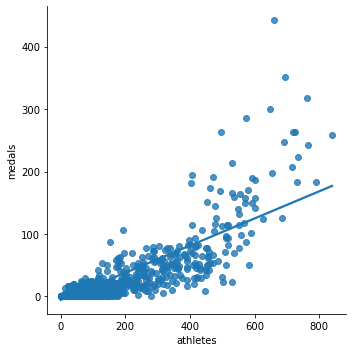

In [13]:
sns.lmplot(x='athletes',y='medals',data= teams, fit_reg=True ,ci=None)

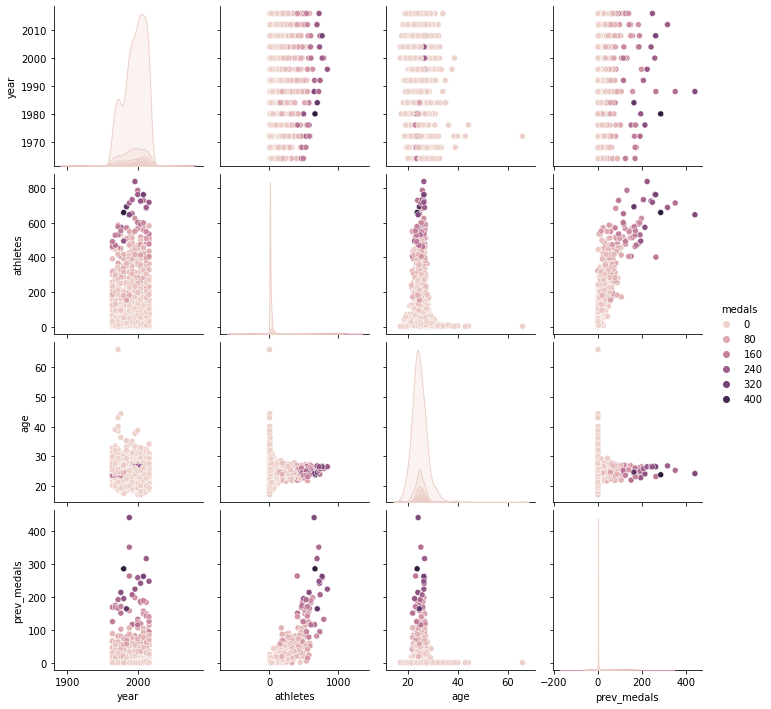

In [16]:
sns.pairplot(teams,hue="medals")

In [17]:
## from above fig in x-axis we get all the features in data like year,prev_medasl,medals,athletes.

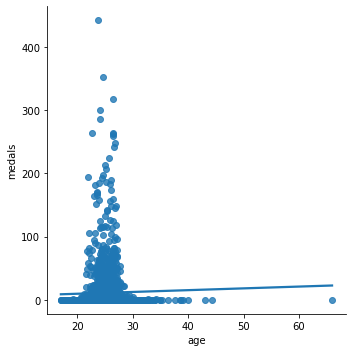

In [18]:
# age has week prediction value i.e correlation value so lets compare age with medals like relationship betweeen age and medals
sns.lmplot(x='age',y='medals', data=teams, fit_reg= True, ci= None)

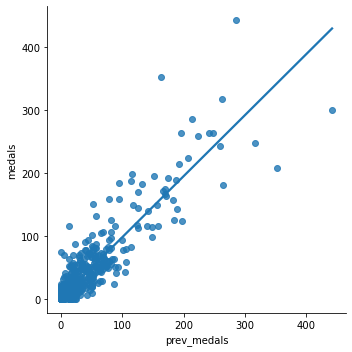

In [19]:
sns.lmplot(x='prev_medals',y='medals', data=teams, fit_reg= True, ci= None)

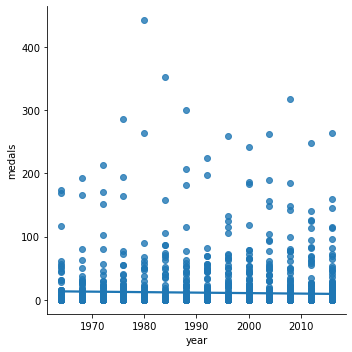

In [20]:
sns.lmplot(x='year',y='medals', data=teams, fit_reg= True, ci= None)

<AxesSubplot:ylabel='Frequency'>

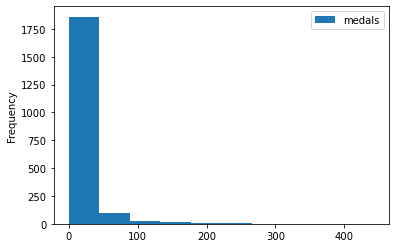

In [22]:
teams.plot.hist(y='medals')

In [30]:
##import numpy as np
##import random

In [31]:
##df = pd.DataFrame(np.random.randint(1,7,6000),columns=['one'])

In [32]:
##df['two']=df['one']+np.random.randint(1,7,6000)

In [33]:
##ax=df.plot.hist(bins=12,alpha=0.5)

# data cleaning 

In [38]:
teams[teams.isnull().any(axis=1)] #it doesn't contains a missing values 

,team,year,athletes,age,prev_medals,medals


In [39]:
teams=teams.dropna()

In [40]:
teams

,team,year,athletes,age,prev_medals,medals
0,AFG,1964,8,22.0,0.0,0
1,AFG,1968,5,23.2,0.0,0
2,AFG,1972,8,29.0,0.0,0
3,AFG,1980,11,23.6,0.0,0
4,AFG,2004,5,18.6,0.0,0
...,...,...,...,...,...,...
2009,ZIM,2000,26,25.0,0.0,0
2010,ZIM,2004,14,25.1,0.0,3
2011,ZIM,2008,16,26.1,3.0,4
2012,ZIM,2012,9,27.3,4.0,0


# train_split and test data

In [44]:
train=teams[teams['year'] < 2012].copy()
test=teams[teams['year'] >= 2012].copy()

In [46]:
train.shape # (rows,columns)

(1609, 6)

In [47]:
test.shape

(405, 6)

## Training a model

In [69]:
from sklearn.linear_model import LinearRegression #sklearn has similar interfaces
reg=LinearRegression() ##initialize the linear regression class for using the linear regression model

In [70]:
predictors=['athletes','prev_medals']
target='medals'

## fit method

In [72]:
reg.fit(train[predictors], train[target]) #from predictors data it will be predict the medals

LinearRegression()

In [76]:
predictions=reg.predict(test[predictors]) # predicting based on new data

In [77]:
predictions # it was numpy like rows and columns

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [78]:
test['predictions']=predictions

In [80]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,-0.961221
7,AFG,2016,3,24.7,1.0,0,-1.176333
23,ALB,2012,10,25.7,0.0,0,-1.425032
24,ALB,2016,6,23.7,0.0,0,-1.711847
35,ALG,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,-1.926958
2001,ZAM,2012,7,22.6,0.0,0,-1.640143
2002,ZAM,2016,7,24.1,0.0,0,-1.640143
2012,ZIM,2012,9,27.3,4.0,0,1.505767


In [82]:
test.loc[test['predictions']< 0,"predictions"]=0 #replacing with 0

In [83]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.000000
7,AFG,2016,3,24.7,1.0,0,0.000000
23,ALB,2012,10,25.7,0.0,0,0.000000
24,ALB,2016,6,23.7,0.0,0,0.000000
35,ALG,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,0.000000
2001,ZAM,2012,7,22.6,0.0,0,0.000000
2002,ZAM,2016,7,24.1,0.0,0,0.000000
2012,ZIM,2012,9,27.3,4.0,0,1.505767


In [86]:
test['predictions']=test['predictions'].round()

In [87]:
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.0
7,AFG,2016,3,24.7,1.0,0,0.0
23,ALB,2012,10,25.7,0.0,0,0.0
24,ALB,2016,6,23.7,0.0,0,0.0
35,ALG,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,0.0
2001,ZAM,2012,7,22.6,0.0,0,0.0
2002,ZAM,2016,7,24.1,0.0,0,0.0
2012,ZIM,2012,9,27.3,4.0,0,2.0


In [88]:
from sklearn.metrics import mean_absolute_error

In [90]:
error= mean_absolute_error(test['medals'],test['predictions'])

In [91]:
error # on average of 3.2987654320987656 medals won by a team.

3.2987654320987656

In [92]:
teams.describe()['medals'] #describing medals column in teams dataset.
# error value is less than std(standard deviation) is a good one
# error value > std value is a bad one 

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [93]:
test[test['team']=='USA']

,team,year,athletes,age,prev_medals,medals,predictions
1931,USA,2012,689,26.7,317.0,248,285.0
1932,USA,2016,719,26.4,248.0,264,236.0


In [94]:
test[test['team']=='IND']

,team,year,athletes,age,prev_medals,medals,predictions
851,IND,2012,95,26.0,3.0,6,7.0
852,IND,2016,130,26.1,6.0,2,12.0


In [99]:
errors=(test['medals'] - test["predictions"]).abs()

In [100]:
errors

6       1.0
7       0.0
23      0.0
24      0.0
35      1.0
       ... 
1983    0.0
2001    0.0
2002    0.0
2012    2.0
2013    0.0
Length: 405, dtype: float64

In [116]:
errors_by_team=errors.groupby(test['team']).mean() #groupby is a pandas method

In [117]:
errors_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [118]:
medals_by_team=test['medals'].groupby(test['team']).mean() #how many medals won by each country or team

In [119]:
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [121]:
error_ratio = errors_by_team/medals_by_team

In [122]:
error_ratio #because of dividing with 0 we getting NaN values.

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [123]:
error_ratio[~pd.isnull(error_ratio)] # 102 NN values we have in dataset and 1/0 gives a infinite value

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [125]:
import numpy as np
error_ratio=error_ratio[np.isfinite(error_ratio)]

In [126]:
error_ratio #after removing infinite values and from below error ratio is low for usa like 12%.

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot:ylabel='Frequency'>

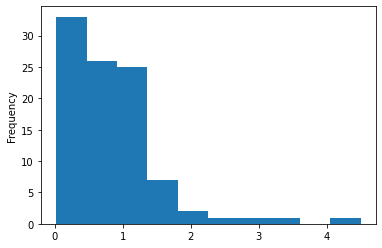

In [127]:
error_ratio.plot.hist() #now create a histogram 

In [128]:
error_ratio.sort_values() #with less value ,that teams will won the medals and the predicion will be good 

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

* Add more predictors like age, height...etc
* try different algorithms like random forest algorithm
